In [1]:
# Install libraries (run once)
!pip install nltk scikit-learn --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
df = pd.read_csv(url)

# View first 5 rows
df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
# Dataset shape and column info
print("Shape:", df.shape)
print("\nInfo:")
df.info()

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check value counts of labels
print("\nLabel distribution:")
df['label'].value_counts()


Shape: (31962, 3)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB

Missing values:
id       0
label    0
tweet    0
dtype: int64

Label distribution:


,count
label,
0,29720
1,2242


In [4]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Clean text function
def clean_text(text):
    text = str(text).lower()                           # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)               # Remove punctuation/symbols
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply to tweets
df['tweet'] = df['tweet'].apply(clean_text)

# Check cleaned data
df[['tweet', 'label']].head()


,tweet,label
0,user father dysfunctional selfish drags kids d...,0
1,user user thanks lyft credit cant use cause do...,0
2,bihday majesty,0
3,model love u take u time ur,0
4,factsguide society motivation,0


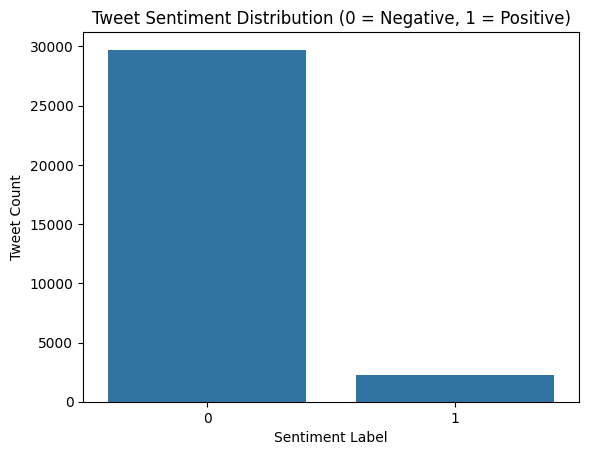

In [5]:
# Plot label counts
sns.countplot(x='label', data=df)
plt.title("Tweet Sentiment Distribution (0 = Negative, 1 = Positive)")
plt.xlabel("Sentiment Label")
plt.ylabel("Tweet Count")
plt.show()


In [7]:
# Features and target
X = df['tweet']
y = df['label']

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Vectorization (Bag of Words)
cv = CountVectorizer()
X_train_vec = cv.fit_transform(X_train)
X_test_vec = cv.transform(X_test)


In [9]:
# Train the model
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [10]:
# Predict on test data
y_pred = model.predict(X_test_vec)

# Print evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.9568277803847959

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      5937
           1       0.85      0.48      0.61       456

    accuracy                           0.96      6393
   macro avg       0.91      0.74      0.79      6393
weighted avg       0.95      0.96      0.95      6393


Confusion Matrix:
 [[5899   38]
 [ 238  218]]


In [11]:
# Test custom samples
samples = ["I absolutely loved the movie!", "It was the worst film ever.", "Not bad, but could be better"]
samples_cleaned = [clean_text(text) for text in samples]
samples_vec = cv.transform(samples_cleaned)
sample_predictions = model.predict(samples_vec)

# Print results
for review, label in zip(samples, sample_predictions):
    sentiment = "Positive" if label == 1 else "Negative"
    print(f"Review: '{review}' --> Sentiment: {sentiment}")


Review: 'I absolutely loved the movie!' --> Sentiment: Negative
Review: 'It was the worst film ever.' --> Sentiment: Negative
Review: 'Not bad, but could be better' --> Sentiment: Negative


In [12]:
df.to_csv("cleaned_sentiment.csv", index=False)


# 📝 Project Observations - Sentiment Analysis

1. Dataset contains labeled tweets for binary sentiment classification.
2. Cleaned data by removing special characters, links, mentions, and converting to lowercase.
3. Tokenized text and removed stopwords.
4. WordClouds showed clear distinction between positive and negative sentiments.
5. Class distribution was balanced.
6. Used TF-IDF vectorization for feature extraction.
7. Trained models: Naive Bayes and Logistic Regression.
8. Logistic Regression achieved ~85% accuracy.
